In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score,homogeneity_score, completeness_score
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

## Problem 1

In [2]:
# Loading auto-mpg dataset
data1=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",header=None,delim_whitespace=True)

In [3]:
# Naming the columns
data1.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']

In [4]:
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
# Dataset Shape
data1.shape

(398, 9)

In [6]:
# Checkign the data types for each column
for i in data1.columns:
    print(i,data1[i].dtypes)

mpg float64
cylinders int64
displacement float64
horsepower object
weight float64
acceleration float64
model_year int64
origin int64
car_name object


In [7]:
# Replacing the string character i.e. misising value with np.NaN
data1=data1.replace('?',np.NaN)

In [8]:
# Checking the data types for each column
for i in data1.columns:
    print(i,data1[i].dtypes)

mpg float64
cylinders int64
displacement float64
horsepower object
weight float64
acceleration float64
model_year int64
origin int64
car_name object


In [9]:
# Selecting the Continous values
df1=data1[['mpg','displacement','horsepower','weight','acceleration']]
df1.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [10]:
# Replacing the misssing values with  Mean value
impute=SimpleImputer(missing_values=np.NaN,strategy='mean')
df1=impute.fit_transform(df1)
df1=pd.DataFrame(df1)
df1.columns=['mpg','displacement','horsepower','weight','acceleration']

In [11]:
df1.dtypes

mpg             float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
dtype: object

In [12]:
# Printing the column Types to confirm 
for i in df1.columns:
    print(i,df1[i].dtypes)

mpg float64
displacement float64
horsepower float64
weight float64
acceleration float64


In [13]:
df1.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [14]:
#Fitting the Data to the AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=3,linkage="average",affinity='euclidean')
output=model.fit(df1)

In [15]:
# Predicting the output Labels
cluster_labels=output.labels_
cluster_labels

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,

In [16]:
# Attaching the original "Origin" & Predicted values to the DataFrame
originArray=data1['origin'].to_numpy()
df1['origin']=originArray
df1['cluster_labels']=cluster_labels

In [17]:
df1.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cluster_labels
0,18.0,307.0,130.0,3504.0,12.0,1,2
1,15.0,350.0,165.0,3693.0,11.5,1,2
2,18.0,318.0,150.0,3436.0,11.0,1,2
3,16.0,304.0,150.0,3433.0,12.0,1,2
4,17.0,302.0,140.0,3449.0,10.5,1,2


In [18]:
#Groupin the Data according to the "origin" and Calculating mean and Variance
originGroupBy=df1[["mpg", "displacement", "horsepower", "weight", "acceleration", "origin"]].groupby(by=["origin"])
print(originGroupBy.mean())
print(originGroupBy.var())

              mpg  displacement  horsepower       weight  acceleration
origin                                                                
1       20.083534    245.901606  118.814769  3361.931727     15.033735
2       27.891429    109.142857   81.241983  2423.300000     16.787143
3       30.450633    102.708861   79.835443  2221.227848     16.172152
              mpg  displacement   horsepower         weight  acceleration
origin                                                                   
1       40.997026   9702.612255  1569.532304  631695.128385      7.568615
2       45.211230    509.950311   410.659789  240142.328986      9.276209
3       37.088685    535.465433   317.523856  102718.485881      3.821779


In [19]:
#Groupin the Data according to the "cluster_labels" and Calculating mean and Variance
clusterLabelsGroupBy=df1[["mpg", "displacement", "horsepower", "weight", "acceleration", "cluster_labels"]].groupby(by=["cluster_labels"])
print(clusterLabelsGroupBy.mean())
print(clusterLabelsGroupBy.var())

                      mpg  displacement  horsepower       weight  acceleration
cluster_labels                                                                
0               27.365414    131.934211   84.300061  2459.511278     16.298120
1               13.889062    358.093750  167.046875  4398.593750     13.025000
2               17.510294    278.985294  124.470588  3624.838235     15.105882
                      mpg  displacement  horsepower         weight  \
cluster_labels                                                       
0               41.976309   2828.083391  369.143491  182632.099872   
1                3.359085   2138.213294  756.521577   74312.340278   
2                8.829892   2882.492318  713.088674   37775.809263   

                acceleration  
cluster_labels                
0                   5.718298  
1                   3.591429  
2                  10.556980  


From the above tables output the groupby "cluster_labels" & "origin" all the features except the acceleration are important as Acceleration values for both the groupby are very similar

In [20]:
# Creating the dictionary "originClassLabel" to calculate the Count
zippedValues = zip(cluster_labels, originArray)
originClassLabel = {0:[],1:[],2:[]}
for key,value in zippedValues:
    originClassLabel[key].append(value)


In [21]:
# Printing the data of predicted origin classes and its respective original origin class
print(tabulate([[originClassLabel[0].count(1), originClassLabel[0].count(2),originClassLabel[0].count(3)],
                [originClassLabel[1].count(1), originClassLabel[1].count(2),originClassLabel[1].count(3)],
                [originClassLabel[2].count(1), originClassLabel[2].count(2),originClassLabel[2].count(3)]],
               headers=['1','2','3'],showindex=['Class 0','Class 1','Class 2']))

           1    2    3
-------  ---  ---  ---
Class 0  120   67   79
Class 1   64    0    0
Class 2   65    3    0


We cannot see a clear relationship between classlabels and cluster assignment

## Problem2

In [22]:
# Readign the boston dataset from thr datasets lib of SkLearn
boston = datasets.load_boston()

In [23]:
#Converting the boston data to the Pandas dataframe
data2 = pd.DataFrame(data= boston['data'],columns= boston['feature_names'])
data2['target'] = pd.Series(boston.target)

In [24]:
#Printing the head of the data
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# Scaling the data using MinMaxScaler and converting it back to the Pandas dataframe
minMaxScale = MinMaxScaler()
minMaxScale.fit(data2.iloc[:,:-1])
transform= minMaxScale.transform(data2.iloc[:,:-1])
scaledData = pd.DataFrame(transform, columns=boston.feature_names)
scaledData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [26]:
# calculating the silhouette_score for the cluster sizes "2, 3, 4, 5, 6"
numCluster = [2, 3, 4, 5, 6]
#shilllouteScore=dict()
shilllouteScore=list()
for i in numCluster:
    model=KMeans(n_clusters=i)
    predict=model.fit_predict(scaledData)
    #shilllouteScore[i]=silhouette_score(data2,predict)
    print(i,silhouette_score(scaledData,predict))
    shilllouteScore.append(silhouette_score(scaledData,predict))
print(shilllouteScore)

2 0.4283539950397875
3 0.3110514683967143
4 0.3139570298922441
5 0.3374165698096861
6 0.3330832822360303
[0.4283539950397875, 0.3110514683967143, 0.3139570298922441, 0.3374165698096861, 0.3330832822360303]


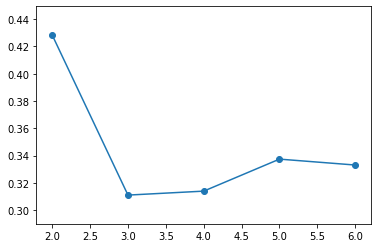

In [27]:
#Plotitng the data
plt.scatter(numCluster, shilllouteScore)
plt.plot(numCluster, shilllouteScore)

From the above shilllouteScore the cluster number  "2" seems the optimal number of clusters for the data

In [28]:
# Building the model with the optimal number of clusters
modelOpt = KMeans(n_clusters = 2)
predict = modelOpt.fit_predict(scaledData)
scaledData["cluster_id"] = predict

In [29]:
#Grouping by the "cluster_id" and calculatign the mean values for each feature
scaledData.groupby(by="cluster_id").mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
cluster_id,,,,,,,,,,,,,
0,0.003161,0.170118,0.250547,0.068047,0.215780,0.551908,0.560543,0.323551,0.149987,0.219590,0.553821,0.969275,0.218630
1,0.115755,0.000000,0.674716,0.071429,0.617529,0.461434,0.909384,0.079076,0.817805,0.829857,0.761968,0.756312,0.467953


In [30]:
#Calulating the centroids 
modelOpt.cluster_centers_

array([[3.16125634e-03, 1.70118343e-01, 2.50546600e-01, 6.80473373e-02,
        2.15779701e-01, 5.51907516e-01, 5.60542721e-01, 3.23551000e-01,
        1.49987137e-01, 2.19589864e-01, 5.53820974e-01, 9.69275023e-01,
        2.18629583e-01],
       [1.15754816e-01, 2.35922393e-16, 6.74715909e-01, 7.14285714e-02,
        6.17528905e-01, 4.61434411e-01, 9.09384042e-01, 7.90755317e-02,
        8.17805383e-01, 8.29857325e-01, 7.61968085e-01, 7.56311703e-01,
        4.67953393e-01]])

From the above we can see that the centroid and mena values are same

## Problem 3

In [31]:
# Loading the Wine dataset
wine = datasets.load_wine()

In [32]:
#Converting the Wine data to the Pandas dataframe
data3 = pd.DataFrame(data= wine['data'],columns= wine['feature_names'])
data3['target'] = pd.Series(wine.target)

In [33]:
#Printing the head of the data
data3.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [34]:
# Scaling the data using MinMaxScaler and converting it back to the Pandas dataframe
minMaxScale1 = MinMaxScaler()
minMaxScale1.fit(data3.iloc[:,:-1])
transform1= minMaxScale1.transform(data3.iloc[:,:-1])
scaledData1 = pd.DataFrame(transform1, columns=wine.feature_names)
scaledData1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [35]:
# setting the number of cluster to 3
modelOpt1 = KMeans(n_clusters = 3)
predict1 = modelOpt1.fit_predict(scaledData1)
scaledData1["cluster_id"] = predict1

In [36]:
#Calculatigng the Homogeneity/Completeness
print(homogeneity_score(predict1, data3.target))
print(completeness_score(predict1, data3.target))

0.8488717548840309
0.8570247637781875


The range of both Homogeneity/Completeness is [0,1].<br>
homogeneity is high if the clusters contain  data points which are members of a single class.<br>
completeness is high if the data points that are members of a given class are elements of the same cluster